In [1]:
%load_ext autoreload
%autoreload 2

# First step, import libraries.
import numpy as np 
import pandas as pd 
import seaborn as sb
from matplotlib import pyplot as plt
from utils import DatasetV1
%matplotlib inline

In [2]:
DATA_PATH = "../data/bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2017-10-20.csv.csv"
PRED_DAYS = 10  # num prediction days for the trained models
TIME_GRAN = 1  # time granularity in minutes
STEP_SIZES = [180, 360, 720]
TRAIN_START = 1200000  # take only afterwards

STEP_SIZE = STEP_SIZES[0]  # 180 for testing
num_test_steps = ((24*60) / TIME_GRAN) * PRED_DAYS 

In [3]:
from bayesian_regression import *
data = read_data(DATA_PATH)
data = data[TRAIN_START:]

 > There are 1459076 rows


In [4]:
#  Retrieve price, v_ask, and v_bid data points from the database.
prices = []
v_ask = []
v_bid = []
num_points = 777600
prices = data['Close'].values.astype('float32')
v_bid = data['Volume_(BTC)'].values.astype('float32')
v_ask = data['Volume_(Currency)'].values.astype('float32')

# Divide prices into three, roughly equal sized, periods:
# prices1, prices2, and prices3.
[prices1, prices2, prices3] = np.array_split(prices, 3)

# Divide v_bid into three, roughly equal sized, periods:
# v_bid1, v_bid2, and v_bid3.
[v_bid1, v_bid2, v_bid3] = np.array_split(v_bid, 3)

# Divide v_ask into three, roughly equal sized, periods:
# v_ask1, v_ask2, and v_ask3.
[v_ask1, v_ask2, v_ask3] = np.array_split(v_ask, 3)

# Use the first time period (prices1) to generate all possible time series of
# appropriate length (180, 360, and 720).
timeseries180 = generate_timeseries(prices1, 180)
timeseries360 = generate_timeseries(prices1, 360)
timeseries720 = generate_timeseries(prices1, 720)

del data

### Cluster Data

In [5]:
# Cluster timeseries180 in 100 clusters using k-means, return the cluster
# centers (centers180), and choose the 20 most effective centers (s1).
centers180 = find_cluster_centers(timeseries180, 100)
s1 = choose_effective_centers(centers180, 20)

centers360 = find_cluster_centers(timeseries360, 100)
s2 = choose_effective_centers(centers360, 20)

centers720 = find_cluster_centers(timeseries720, 100)
s3 = choose_effective_centers(centers720, 20)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4484836097.36
start iteration
done sorting
end inner loop
Iteration 1, inertia 4292408516.89
start iteration
done sorting
end inner loop
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 2, inertia 4234793485.16
start iteration
done sorting
end inner loop
Initialization complete
Iteration 0, inertia 4493151966.09
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 4556887286.3
start iteration
done sorting
end inner loop
Iteration 3, inertia 4203531668.29
start iteration
done sorting
end inner loop
Initialization complete
Initialization complete
Iteration 1, inertia 4275934818.67
start iteration
done sorting
Iteration 0, inertia 4521855692.25
start iteration
done sorting
end inner loop
Iteration 1, inertia 4337609402.8
start iteration
done sorting
s

start iteration
done sorting
end inner loop
Iteration 10, inertia 4164631102.81
start iteration
done sorting
end inner loop
Iteration 9, inertia 4132993549.39
start iteration
done sorting
end inner loop
Iteration 9, inertia 4125953710.85
start iteration
done sorting
Iteration 8, inertia 4117010221.4
start iteration
done sorting
end inner loop
Iteration 13, inertia 4080668972.99
start iteration
end inner loop
done sorting
Iteration 9, inertia 4101394988.84
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 4157002955.1
Iteration 11, inertia 4069666804.96
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 5, inertia 4145375807.09
start iteration
done sorting
Iteration 10, inertia 4125344767.91
start iteration
done sorting
end inner loop
Iteration 8, inertia 4127968388.57
start iteration
done sorting
end inner loop
end inner loop
Iteration 10, inertia 4099065786.31
start iteration
done sorting
end inner loop
Iter

start iteration
done sorting
Iteration 23, inertia 4082524049.48
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 19, inertia 4051514008.58
start iteration
done sorting
end inner loop
Iteration 13, inertia 4095879343.57
start iteration
done sorting
end inner loop
Iteration 16, inertia 4106834794.21
start iteration
done sorting
end inner loop
Iteration 19, inertia 4135699050.52
start iteration
done sorting
end inner loop
Iteration 18, inertia 4100897864.4
start iteration
done sorting
end inner loop
Iteration 29, inertia 4135989776.71
start iteration
done sorting
end inner loop
Iteration 22, inertia 4072004736.01
start iteration
Iteration 23, inertia 4080761123.3
start iteration
done sorting
done sorting
Iteration 24, inertia 4080474584.01
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 17, inertia 4085959851.26
start iteration
done sorting
end inner loop
Iteration 20, inertia 4050651608.8
start iteration
done sorting

start iteration
done sorting
Iteration 37, inertia 4066564289.15
start iteration
done sorting
end inner loop
end inner loop
Iteration 24, inertia 4103231336.5
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 36, inertia 4062592412.28
done sorting
start iteration
end inner loop
Iteration 28, inertia 4124985763.44
start iteration
done sorting
end inner loop
Iteration 22, inertia 4083816702.85
start iteration
done sorting
end inner loop
Iteration 43, inertia 4133318224.62
start iteration
done sorting
end inner loop
Iteration 38, inertia 4066473192.16
start iteration
done sorting
Iteration 28, inertia 4039289164.63
start iteration
end inner loop
done sorting
Iteration 37, inertia 4062346347.15
start iteration
done sorting
end inner loop
end inner loop
Iteration 26, inertia 4074651968.06
start iteration
done sorting
end inner loop
Iteration 31, inertia 4064345577.57
start iteration
done sorting
end inner loop
Iteration 25, inertia 4102595820.96
start itera

done sorting
end inner loop
Iteration 38, inertia 4024921020.29
done sorting
start iteration
end inner loop
Iteration 35, inertia 4063637164.64
start iteration
done sorting
Iteration 50, inertia 4058629063.74
start iteration
done sorting
end inner loop
end inner loop
Iteration 36, inertia 4091113744.03
start iteration
done sorting
Iteration 39, inertia 4060647224.42
start iteration
end inner loop
done sorting
end inner loop
Iteration 39, inertia 4024701787.96
start iteration
done sorting
start iteration
Iteration 51, inertia 4065487780.29
done sorting
Iteration 38, inertia 4119578990.03
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 34, inertia 4098050393.76
start iteration
done sorting
Iteration 32, inertia 4073185255.94
end inner loop
start iteration
done sorting
end inner loop
Iteration 51, inertia 4058575851.82
start iteration
done sorting
end inner loop
Iteration 36, inertia 4062589953.09
start iteration
done sorting
end inner loop
Iteration 37

start iteration
done sorting
Iteration 66, inertia 4059995764.72
start iteration
done sorting
end inner loop
end inner loop
Iteration 41, inertia 4065898190.09
start iteration
done sorting
Iteration 55, inertia 4021788495.49
start iteration
done sorting
end inner loop
end inner loop
Iteration 46, inertia 4080393876.03
start iteration
done sorting
Iteration 49, inertia 4056676784.9
start iteration
done sorting
Iteration 45, inertia 4055156418.04
start iteration
done sorting
end inner loop
end inner loop
Iteration 67, inertia 4059972005.66
end inner loop
start iteration
done sorting
end inner loop
Iteration 44, inertia 4097600698.79
start iteration
done sorting
end inner loop
Iteration 48, inertia 4114198539.24
start iteration
done sorting
end inner loop
Iteration 56, inertia 4021750973.04
start iteration
done sorting
end inner loop
Iteration 68, inertia 4059948609.45
start iteration
done sorting
end inner loop
Iteration 47, inertia 4080023424.36
start iteration
done sorting
end inner lo

Iteration 62, inertia 4054621061.69
start iteration
done sorting
end inner loop
Iteration 53, inertia 4061716901.79
start iteration
done sorting
end inner loop
Iteration 56, inertia 4097161645.08
start iteration
done sorting
Iteration 59, inertia 4078886118.68
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 60, inertia 4113077702.31
start iteration
done sorting
end inner loop
Iteration 63, inertia 4054615996.84
start iteration
done sorting
end inner loop
Iteration 54, inertia 4061654972.48
Iteration 58, inertia 4053304230.24
start iteration
start iteration
done sorting
done sorting
Iteration 60, inertia 4078885074.79
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 57, inertia 4097155562.5
start iteration
done sorting
end inner loop
Iteration 64, inertia 4054604295.78
start iteration
done sorting
end inner loop
Iteration 61, inertia 4113038056.23
start iteration
done sorting
end inner loop
Iteration 65, inertia 4054

Iteration 88, inertia 4051628906.47
start iteration
done sorting
end inner loop
Iteration 92, inertia 4097184664.89
start iteration
done sorting
end inner loop
Iteration 89, inertia 4051618268.82
start iteration
done sorting
end inner loop
Iteration 93, inertia 4097079510.37
start iteration
done sorting
end inner loop
Iteration 90, inertia 4051614170.24
start iteration
done sorting
end inner loop
Iteration 94, inertia 4096795550.87
start iteration
done sorting
end inner loop
Iteration 91, inertia 4051611938.47
start iteration
done sorting
end inner loop
Iteration 95, inertia 4096677829.28
start iteration
done sorting
end inner loop
Iteration 92, inertia 4051610334.74
start iteration
done sorting
Iteration 96, inertia 4096632208.47
start iteration
done sorting
end inner loop
end inner loop
Iteration 97, inertia 4096607799.11
start iteration
done sorting
Iteration 93, inertia 4051608055.95
start iteration
done sorting
end inner loop
end inner loop
Iteration 98, inertia 4096596712.8
start

end inner loop
end inner loop
Iteration 11, inertia 12699689365.0
start iteration
done sorting
Iteration 11, inertia 12717149921.7
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 13465927835.4
start iteration
done sorting
Iteration 14, inertia 12616289919.4
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 12795162250.0
start iteration
done sorting
end inner loop
Iteration 17, inertia 12641622368.2
start iteration
done sorting
end inner loop
Iteration 12, inertia 12689936091.5
start iteration
done sorting
Iteration 12, inertia 12705434972.9
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 13252640015.0
start iteration
done sorting
Iteration 15, inertia 12607322368.0
done sorting
start iteration
end inner loop
end inner loop
Iteration 15, inertia 12788660513.0
start iteration
done sorting
end inner loop
Iteration 18, inertia 12641222576.3
start iteration
done sorting
end inner loop
Iteration 13

start iteration
done sorting
end inner loop
Iteration 31, inertia 12559393570.7
done sorting
start iteration
end inner loop
Iteration 31, inertia 12708966747.5
start iteration
done sorting
end inner loop
Iteration 28, inertia 12588004085.7
start iteration
done sorting
end inner loop
Iteration 29, inertia 12624780075.8
start iteration
done sorting
end inner loop
Iteration 18, inertia 12742379571.0
done sorting
start iteration
end inner loop
Iteration 34, inertia 12632643003.1
start iteration
done sorting
Iteration 32, inertia 12559333256.3
end inner loop
start iteration
done sorting
end inner loop
Iteration 32, inertia 12705862334.8
start iteration
done sorting
end inner loop
Iteration 29, inertia 12587592977.1
start iteration
done sorting
end inner loop
Iteration 30, inertia 12623761152.5
start iteration
done sorting
end inner loop
Iteration 19, inertia 12734396655.5
start iteration
done sorting
Iteration 35, inertia 12631590775.3
end inner loop
start iteration
done sorting
Iteration 3

done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 1, inertia 13564214273.2
start iteration
done sorting
end inner loop
Iteration 43, inertia 12619558385.4
start iteration
done sorting
end inner loop
Iteration 5, inertia 12774264019.0
start iteration
done sorting
Iteration 32, inertia 12616493815.0
start iteration
done sorting
Iteration 46, inertia 12556095961.8
start iteration
done sorting
Iteration 48, inertia 12628976214.6
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 7, inertia 12765525163.4
start iteration
done sorting
end inner loop
Iteration 0, inertia 14210745965.0
start iteration
done sorting
Iteration 43, inertia 12579938076.9
Iteration 46, inertia 12698188373.2
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 2, inertia 13336561406.3
start iteration
done sorting
end inner loop
Iteration 6, inertia 12

end inner loop
end inner loop
end inner loop
Iteration 18, inertia 12680060856.6
start iteration
done sorting
end inner loop
Iteration 58, inertia 12628865709.1
start iteration
done sorting
end inner loop
Iteration 56, inertia 12538638360.0
start iteration
done sorting
end inner loop
Iteration 53, inertia 12575702750.3
start iteration
done sorting
end inner loop
Iteration 13, inertia 12875963984.4
start iteration
done sorting
end inner loop
Iteration 17, inertia 12579784613.5
start iteration
done sorting
Iteration 54, inertia 12619522787.0
start iteration
done sorting
end inner loop
Iteration 19, inertia 12679042082.3
Iteration 9, inertia 12700858462.3
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 43, inertia 12590236114.8
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 59, inertia 12628864709.9
start iteration
done sorting
end inner loop
Iteration 57, inertia 12538499866.1
start iteration
done sorting
end inner l

Iteration 31, inertia 12659070832.9
start iteration
done sorting
end inner loop
Iteration 53, inertia 12570936110.9
done sorting
start iteration
end inner loop
Iteration 25, inertia 12789835859.7
start iteration
done sorting
end inner loop
Iteration 69, inertia 12627593972.7
start iteration
done sorting
end inner loop
Iteration 67, inertia 12538062282.5
start iteration
done sorting
end inner loop
Iteration 19, inertia 12558960247.5
start iteration
done sorting
end inner loop
Iteration 64, inertia 12574635179.0
start iteration
done sorting
end inner loop
Iteration 30, inertia 12463782374.6
start iteration
done sorting
end inner loop
Iteration 32, inertia 12658560327.4
start iteration
done sorting
end inner loop
Iteration 65, inertia 12619482788.9
start iteration
done sorting
end inner loop
Iteration 26, inertia 12787107027.5
start iteration
done sorting
end inner loop
Iteration 54, inertia 12570825018.2
start iteration
done sorting
end inner loop
Iteration 70, inertia 12627544502.2
star

start iteration
Iteration 74, inertia 12574135117.6
start iteration
done sorting
done sorting
Iteration 41, inertia 12771667869.9
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 44, inertia 12445701595.5
start iteration
done sorting
end inner loop
Iteration 75, inertia 12619205225.0
start iteration
done sorting
end inner loop
Iteration 64, inertia 12570600408.6
start iteration
done sorting
end inner loop
Iteration 42, inertia 12771345168.5
start iteration
done sorting
end inner loop
Iteration 43, inertia 12656876626.1
start iteration
done sorting
end inner loop
Iteration 75, inertia 12574025628.6
start iteration
done sorting
Iteration 45, inertia 12442277615.1
start iteration
done sorting
end inner loop
Iteration 30, inertia 12550107780.4
start iteration
done sorting
end inner loop
end inner loop
Iteration 43, inertia 12771065917.2
start iteration
done sorting
end inner loop
Iteration 76, inertia 12619202866.1
start iteration
done sorting
end inner l

start iteration
done sorting
end inner loop
Iteration 65, inertia 12769730808.9
start iteration
done sorting
end inner loop
Iteration 64, inertia 12655441215.5
start iteration
done sorting
end inner loop
Iteration 96, inertia 12571673599.4
start iteration
done sorting
end inner loop
Iteration 66, inertia 12769601338.9
start iteration
done sorting
end inner loop
Iteration 65, inertia 12655438432.7
start iteration
done sorting
end inner loop
Iteration 97, inertia 12571666322.3
start iteration
done sorting
end inner loop
Iteration 67, inertia 12768857228.4
start iteration
done sorting
end inner loop
Iteration 66, inertia 12655438191.8
start iteration
done sorting
end inner loop
Iteration 98, inertia 12571660640.3
start iteration
done sorting
end inner loop
Iteration 68, inertia 12768602666.4
start iteration
Iteration 67, inertia 12655437963.1
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 99, inertia 12571656728.7
start iteration
done sorting
end inner l

done sorting
Iteration 6, inertia 38077787186.0
start iteration
done sorting
end inner loop
end inner loop
Iteration 9, inertia 38423654503.8
start iteration
done sorting
end inner loop
Iteration 6, inertia 38263413953.1
start iteration
done sorting
end inner loop
Iteration 10, inertia 38097529822.2
start iteration
done sorting
end inner loop
Iteration 11, inertia 37488865723.7
start iteration
done sorting
end inner loop
Iteration 7, inertia 38024650754.4
start iteration
done sorting
end inner loop
Iteration 10, inertia 38413968243.7
start iteration
done sorting
end inner loop
Iteration 7, inertia 38197669054.1
start iteration
done sorting
end inner loop
Iteration 11, inertia 38055735789.9
start iteration
done sorting
end inner loop
Iteration 12, inertia 37450149631.2
start iteration
done sorting
end inner loop
Iteration 8, inertia 37969870970.4
start iteration
done sorting
end inner loop
Iteration 11, inertia 38405941741.1
start iteration
done sorting
end inner loop
Iteration 8, inert

start iteration
done sorting
end inner loop
Iteration 24, inertia 37719959273.0
start iteration
done sorting
end inner loop
Iteration 27, inertia 38154205485.3
start iteration
done sorting
end inner loop
Iteration 13, inertia 37939282413.7
start iteration
done sorting
end inner loop
Iteration 28, inertia 37813169372.4
start iteration
done sorting
end inner loop
Iteration 24, inertia 37860283403.8
start iteration
done sorting
end inner loop
Iteration 25, inertia 37715490388.0
start iteration
done sorting
Iteration 28, inertia 37299363157.5
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 37915966990.1
start iteration
done sorting
end inner loop
Iteration 28, inertia 38134117947.7
start iteration
done sorting
end inner loop
Iteration 29, inertia 37811799398.5
start iteration
done sorting
end inner loop
Iteration 25, inertia 37858862467.4
start iteration
done sorting
end inner loop
Iteration 26, inertia 37709848133.1
start iteration
done sorting
Iteration 2

end inner loop
Iteration 44, inertia 37846322198.3
start iteration
done sorting
end inner loop
Iteration 42, inertia 37666071919.6
start iteration
done sorting
end inner loop
Iteration 45, inertia 37801721373.6
start iteration
done sorting
end inner loop
Iteration 45, inertia 37285123526.3
start iteration
done sorting
end inner loop
Iteration 30, inertia 37733534411.2
start iteration
done sorting
end inner loop
Iteration 45, inertia 37844255863.4
start iteration
done sorting
end inner loop
Iteration 43, inertia 37666046163.2
start iteration
done sorting
end inner loop
Iteration 46, inertia 37801592743.9
start iteration
done sorting
end inner loop
Iteration 46, inertia 37285122597.2
start iteration
done sorting
end inner loop
Iteration 31, inertia 37731388759.9
start iteration
done sorting
end inner loop
Iteration 46, inertia 37842387806.0
start iteration
done sorting
end inner loop
Iteration 44, inertia 37666000744.0
start iteration
done sorting
end inner loop
Iteration 47, inertia 378

start iteration
done sorting
end inner loop
end inner loop
Iteration 57, inertia 37655300566.4
start iteration
done sorting
Iteration 3, inertia 38511712188.5
start iteration
done sorting
end inner loop
end inner loop
Iteration 73, inertia 37790012819.3
start iteration
done sorting
end inner loop
Iteration 4, inertia 38248182027.0
start iteration
done sorting
Iteration 1, inertia 40046032631.9
start iteration
done sorting
end inner loop
Iteration 58, inertia 37654985432.9
start iteration
done sorting
end inner loop
end inner loop
Iteration 74, inertia 37790012819.3
center shift 0.000000e+00 within tolerance 2.658948e-01
Iteration 5, inertia 38065538736.9
start iteration
done sorting
end inner loop
Iteration 59, inertia 37654601022.6
start iteration
done sorting
end inner loop
Iteration 2, inertia 39265764049.0
start iteration
done sorting
end inner loop
Iteration 6, inertia 37954938209.1
start iteration
done sorting
Iteration 60, inertia 37654404384.0
start iteration
end inner loop
don

start iteration
done sorting
end inner loop
Iteration 81, inertia 37559102030.7
start iteration
done sorting
end inner loop
Iteration 16, inertia 38055143478.9
start iteration
done sorting
end inner loop
Iteration 24, inertia 37637671958.8
start iteration
done sorting
Iteration 11, inertia 37901331176.2
end inner loop
start iteration
done sorting
end inner loop
Iteration 28, inertia 37658839712.6
start iteration
done sorting
end inner loop
Iteration 17, inertia 38040702323.9
start iteration
done sorting
end inner loop
Iteration 25, inertia 37635051281.6
start iteration
Iteration 82, inertia 37558799496.0
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 12, inertia 37863690334.1
start iteration
done sorting
end inner loop
Iteration 29, inertia 37657224209.8
start iteration
done sorting
end inner loop
Iteration 18, inertia 38028042780.1
start iteration
done sorting
end inner loop
Iteration 13, inertia 37833733254.7
start iteration
done sorting
end inner l

done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 41, inertia 37915965039.4
start iteration
done sorting
end inner loop
Iteration 50, inertia 37592246047.3
start iteration
done sorting
end inner loop
Iteration 35, inertia 37636758087.1
start iteration
done sorting
end inner loop
Iteration 48, inertia 37563277146.5
start iteration
done sorting
end inner loop
Iteration 42, inertia 37914003354.0
start iteration
done sorting
end inner loop
Iteration 51, inertia 37592207840.9
start iteration
done sorting
end inner loop
Iteration 36, inertia 37635153634.6
start iteration
done sorting
end inner loop
Iteration 49, inertia 37561825831.4
start iteration
done sorting
end inner loop
Iteration 37, inertia 37634269235.2
start iteration
done sorting
end inner loop
Iteration 43, inertia 37909374636.7
start iteration
done sorting
end inner loop
Iteration 52, inertia 37592177091.5
start iteration
done sorting
end inner loop
Iteration 50, inertia 37560718435.6
start iterat

start iteration
done sorting
end inner loop
Iteration 100, inertia 37549197413.4
start iteration
done sorting
end inner loop
Iteration 101, inertia 37549197413.4
center shift 0.000000e+00 within tolerance 2.658948e-01


In [6]:
# Use the second time period to generate the independent and dependent
# variables in the linear regression model:
# Δp = w0 + w1 * Δp1 + w2 * Δp2 + w3 * Δp3 + w4 * r.
Dpi_r, Dp = linear_regression_vars(prices2, v_bid2, v_ask2, s1, s2, s3)

# Find the parameter values w (w0, w1, w2, w3, w4).
w = find_parameters_w(Dpi_r, Dp)

# Predict average price changes over the third time period.
dps = predict_dps(prices3, v_bid3, v_ask3, s1, s2, s3, w)

In [31]:
# What's your 'Fuck You Money' number?
bank_balance, real_dps = evaluate_performance(prices3, dps, t=0.00001, step=1)
print bank_balance

1669.53979492


In [43]:
s3.shape

(20, 721)

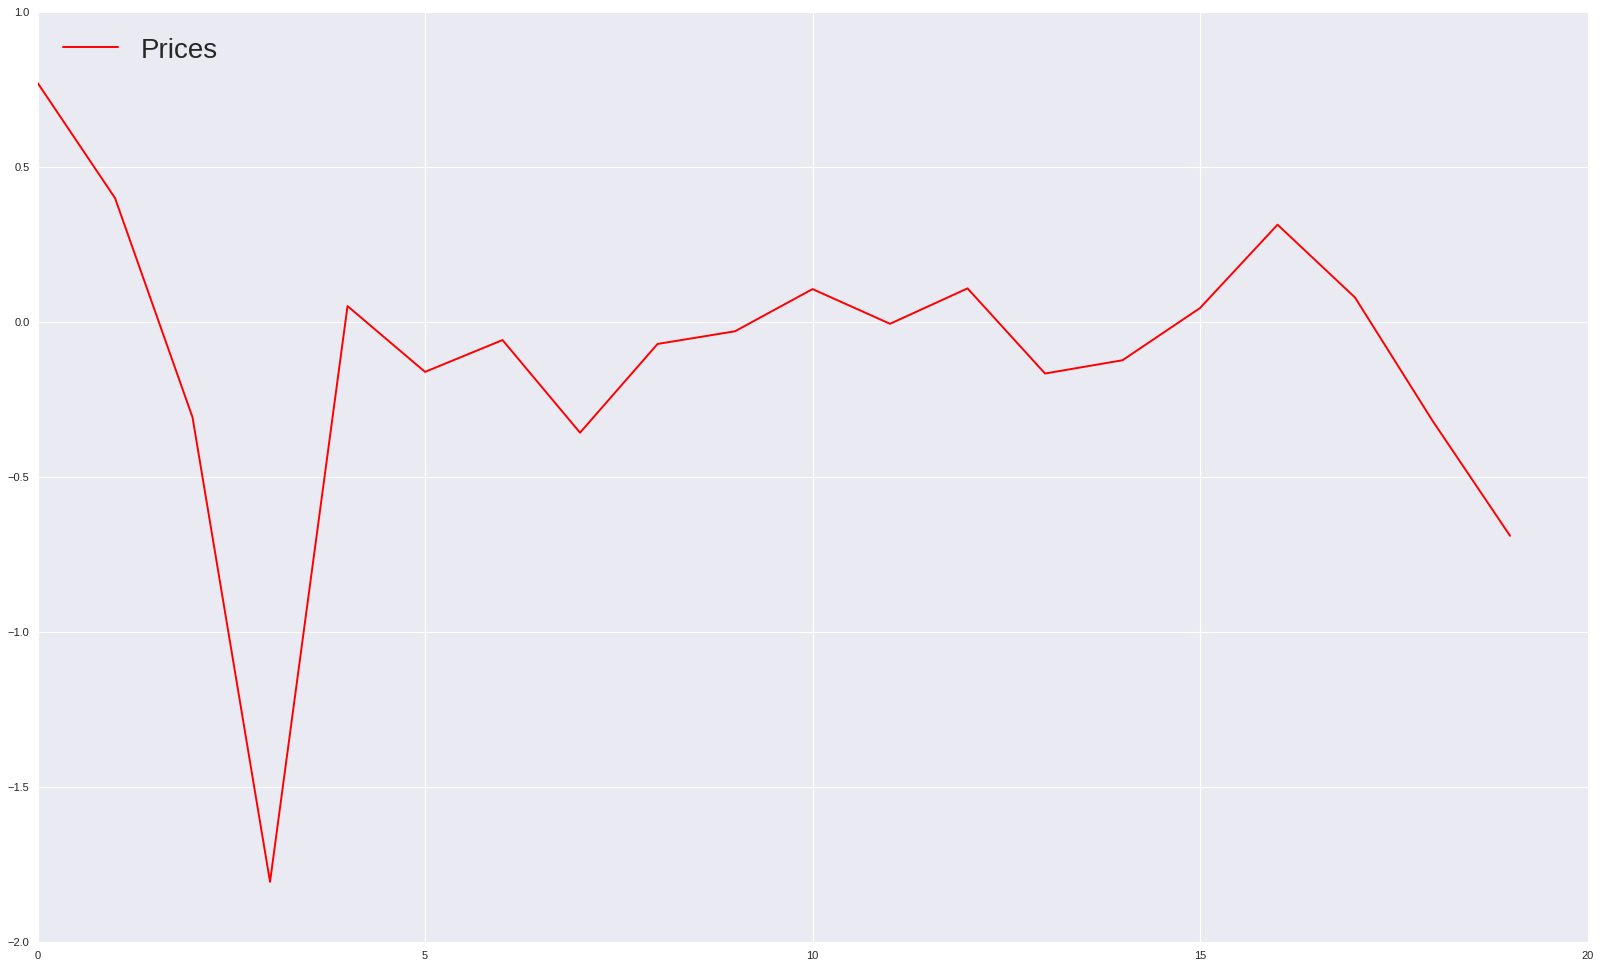

In [46]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(s3[:,720], color = 'red', label = 'Prices')
plt.legend(loc=2, prop={'size': 25})

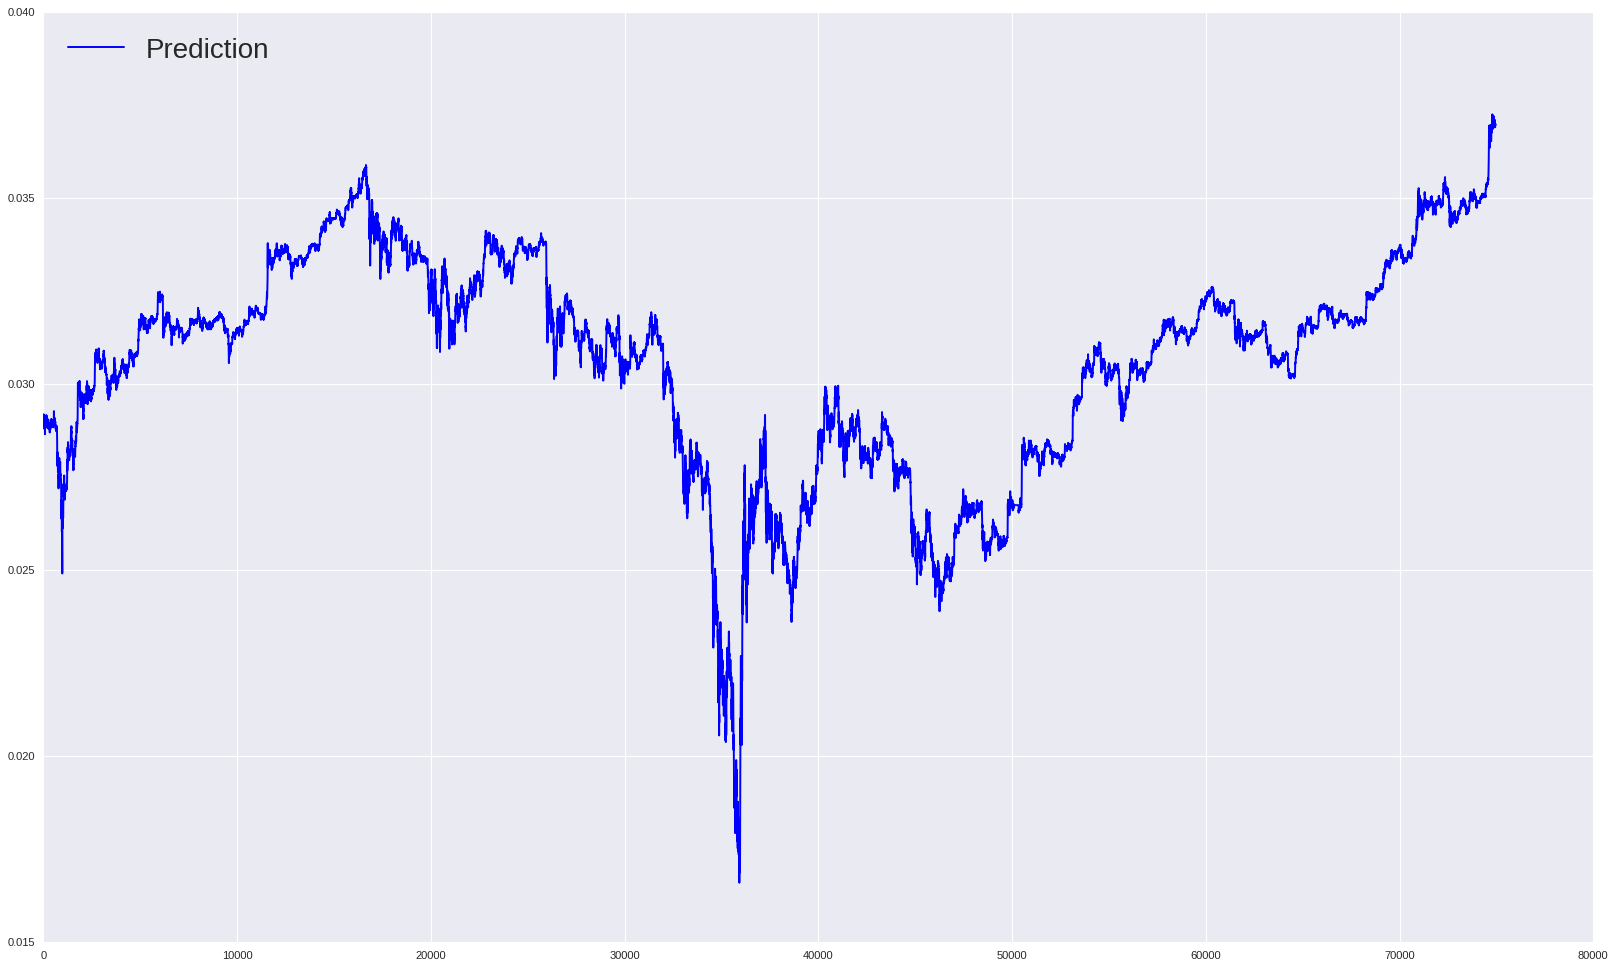

In [37]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(dps, color = 'blue', label = 'Prediction')
plt.legend(loc=2, prop={'size': 25})